In [77]:
!pip install opendatasets


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [78]:
import opendatasets as od

# Replace with the URL of the dataset you want to download from Kaggle
dataset_url = 'https://www.kaggle.com/competitions/playground-series-s5e8'
od.download(dataset_url)

Skipping, found downloaded files in ".\playground-series-s5e8" (use force=True to force download)


In [79]:
import pandas as pd
df_train=pd.read_csv('playground-series-s5e8/train.csv')
df_test=pd.read_csv('playground-series-s5e8/test.csv')

## Cleaning

In [80]:
df_train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [81]:
df_test

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown
249996,999996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure
249997,999997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success
249998,999998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown


In [82]:
df_train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [83]:
df_test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [84]:
df_train.duplicated().sum()

0

In [85]:
df_test.duplicated().sum()

0

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [87]:
df_train["poutcome"].unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

In [88]:
ids = df_train["id"] 

In [89]:
import numpy as np

# Select only numeric columns for outlier detection
df_train_numeric = df_train.select_dtypes(include=np.number)

Q1 = df_train_numeric.quantile(0.25)
Q3 = df_train_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame based on outliers in numeric columns
df_train_o = df_train[~((df_train_numeric < (Q1 - 1.5 * IQR)) | (df_train_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [90]:

original_rows = 750000

outlier_count = original_rows - len(df_train)
print(f"Number of outliers removed: {outlier_count}")

Number of outliers removed: 0


In [91]:
df_train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [92]:
binary_map = {"yes": 1, "no": 0}
df_train["default"] = df_train["default"].map(binary_map)
df_train["housing"] = df_train["housing"].map(binary_map)
df_train["loan"] = df_train["loan"].map(binary_map)


In [93]:
edu_map = {"unknown": -1, "primary": 0, "secondary": 1, "tertiary": 2}
df_train["education"] = df_train["education"].map(edu_map)


In [94]:

for col in ["job", "marital", "contact", "month", "poutcome"]:
    df_train[col], _ = pd.factorize(df_train[col])


In [95]:

df_train["pdays_was_contacted"] = (df_train["pdays"] != -1).astype(int)


In [96]:
df_train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_was_contacted
0,0,42,0,0,1,0,7,0,0,0,25,0,117,3,-1,0,0,0,0
1,1,38,1,0,1,0,514,0,0,1,18,1,185,1,-1,0,0,0,0
2,2,36,1,0,1,0,602,1,0,1,14,2,111,2,-1,0,0,0,0
3,3,27,2,1,1,0,34,1,0,1,28,2,10,2,-1,0,0,0,0
4,4,26,0,0,1,0,889,1,0,0,3,3,902,1,-1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,8,1,1,0,1282,0,1,1,4,6,1006,2,-1,0,0,1,0
749996,749996,69,9,2,2,0,631,0,0,0,19,0,87,1,-1,0,0,0,0
749997,749997,50,1,0,1,0,217,1,0,0,17,4,113,1,-1,0,0,0,0
749998,749998,32,0,0,1,0,-274,0,0,0,26,0,108,6,-1,0,0,0,0


In [97]:
X = df_train.drop(["id", "y"], axis=1)
y = df_train["y"]

## Analysis

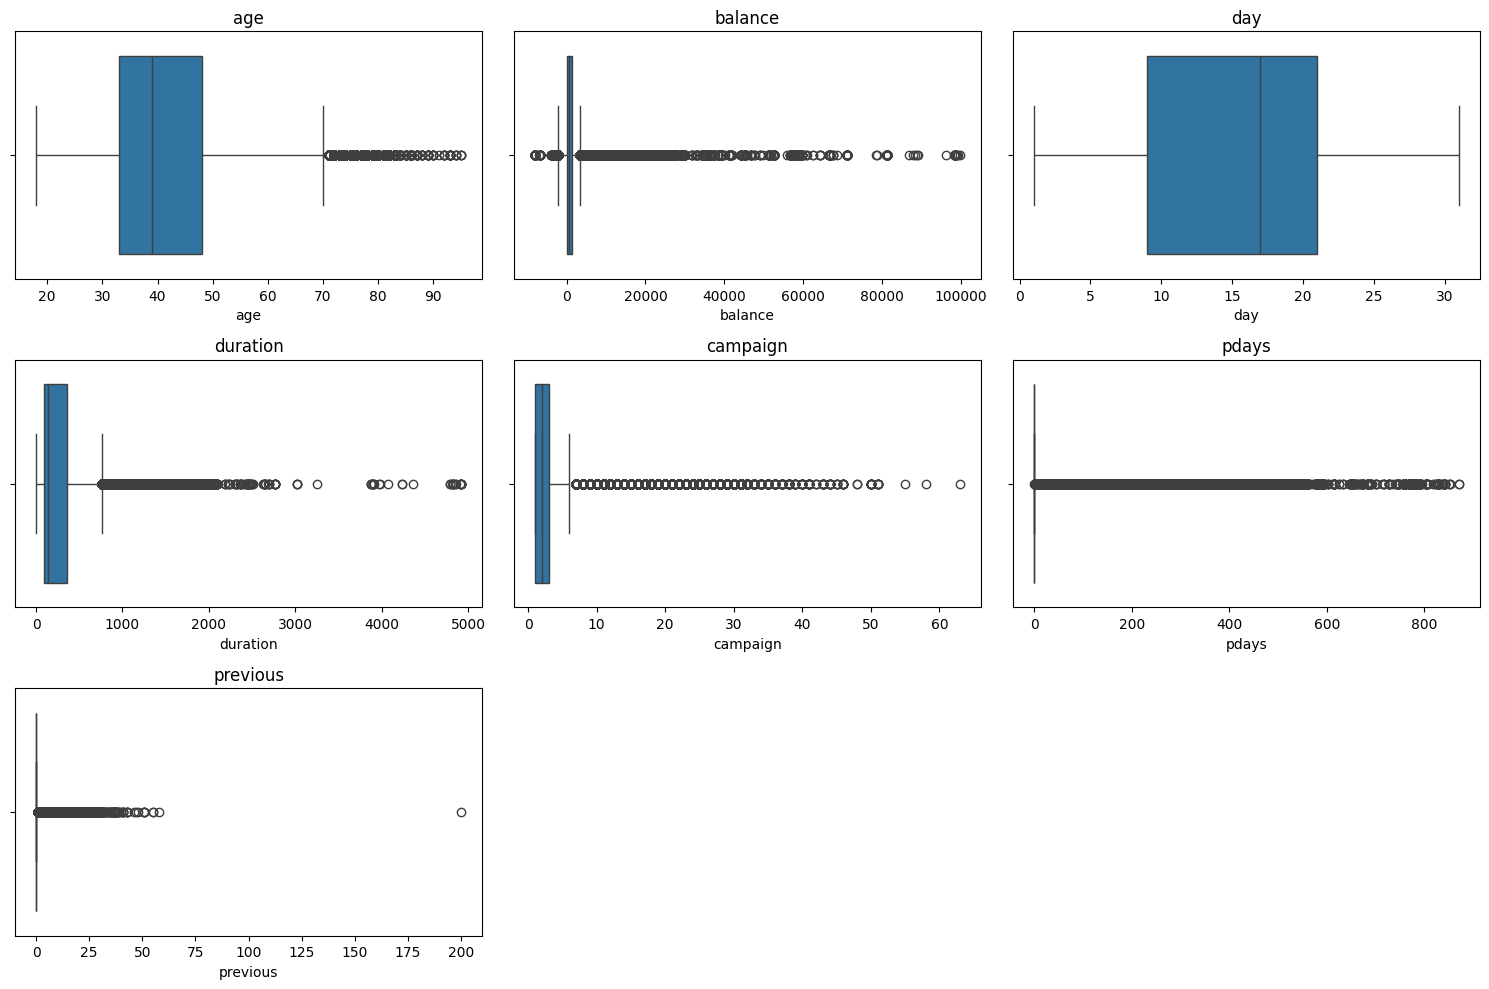

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [99]:
import numpy as np

def cap_outliers(df, cols, lower_quantile=0.01, upper_quantile=0.99):
    df_copy = df.copy()
    for col in cols:
        low = df_copy[col].quantile(lower_quantile)
        high = df_copy[col].quantile(upper_quantile)
        df_copy[col] = np.where(df_copy[col] < low, low,
                                np.where(df_copy[col] > high, high, df_copy[col]))
    return df_copy

# numeric columns in dataset
num_cols = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# apply capping
df_capped = cap_outliers(df_train, num_cols)

# check results
df_capped[num_cols].describe()


,age,balance,day,duration,campaign,pdays,previous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.869367,1116.189095,16.122396,253.934556,2.511212,22.060304,0.259325
std,9.852772,1802.932063,8.241637,261.848888,2.257366,75.241195,0.930102
min,24.000000,-974.000000,2.000000,7.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000
max,66.000000,10861.000000,31.000000,1206.000000,14.000000,363.000000,6.000000


ValueError: num must be an integer with 1 <= num <= 6, not 7

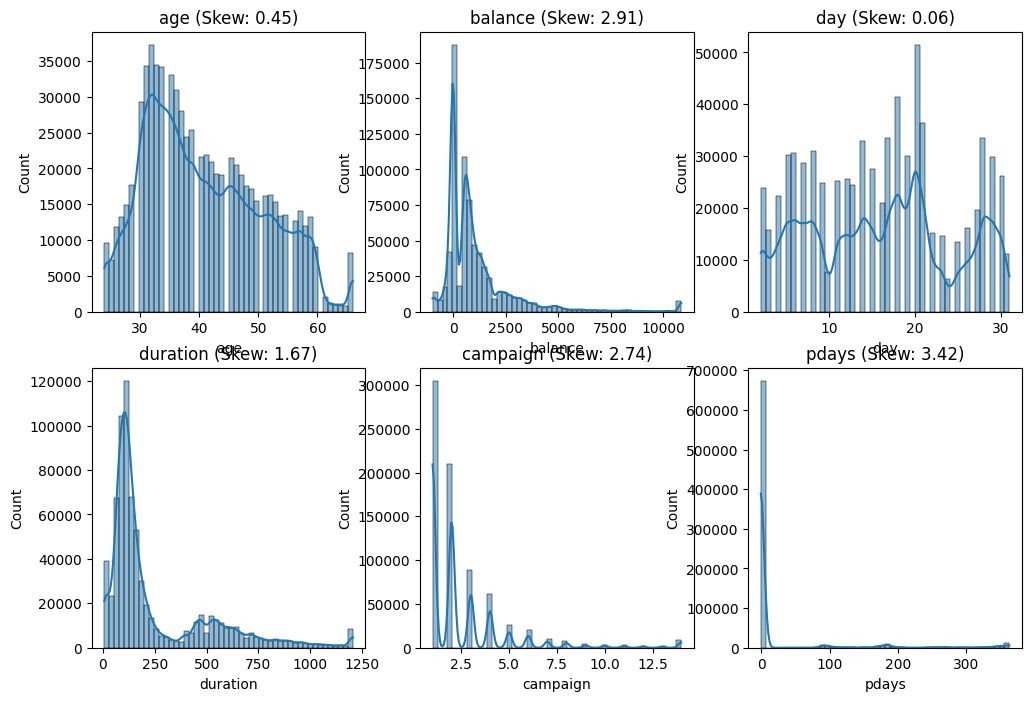

In [100]:

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_capped[col], kde=True, bins=50)
    plt.title(f"{col} (Skew: {df_capped[col].skew():.2f})")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Apply log1p transform (log(x+1))
skewed_cols = ["balance", "duration", "campaign", "previous"]
for col in skewed_cols:
    df_capped[col] = np.log1p(df_capped[col])

# Handle pdays separately
df_capped["pdays_log"] = df_capped["pdays"].apply(lambda x: np.log1p(x) if x > 0 else 0)


c:\Users\anuva\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\anuva\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_capped

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pdays_was_contacted,pdays_log
0,0,42.0,0,0,1,0,2.079442,0,0,0,25.0,0,4.770685,1.386294,-1.0,0.00000,0,0,0,0.000000
1,1,38.0,1,0,1,0,6.244167,0,0,1,18.0,1,5.225747,0.693147,-1.0,0.00000,0,0,0,0.000000
2,2,36.0,1,0,1,0,6.401917,1,0,1,14.0,2,4.718499,1.098612,-1.0,0.00000,0,0,0,0.000000
3,3,27.0,2,1,1,0,3.555348,1,0,1,28.0,2,2.397895,1.098612,-1.0,0.00000,0,0,0,0.000000
4,4,26.0,0,0,1,0,6.791221,1,0,0,3.0,3,6.805723,0.693147,-1.0,0.00000,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29.0,8,1,1,0,7.156956,0,1,1,4.0,6,6.914731,1.098612,-1.0,0.00000,0,1,0,0.000000
749996,749996,66.0,9,2,2,0,6.448889,0,0,0,19.0,0,4.477337,0.693147,-1.0,0.00000,0,0,0,0.000000
749997,749997,50.0,1,0,1,0,5.384495,1,0,0,17.0,4,4.736198,0.693147,-1.0,0.00000,0,0,0,0.000000
749998,749998,32.0,0,0,1,0,NaN,0,0,0,26.0,0,4.691348,1.945910,-1.0,0.00000,0,0,0,0.000000


In [ ]:
df_capped.isnull().sum()

id                          0
age                         0
job                         0
marital                     0
education                   0
default                     0
balance                101072
housing                     0
loan                        0
contact                     0
day                         0
month                       0
duration                    0
campaign                    0
pdays                       0
previous                    0
poutcome                    0
y                           0
pdays_was_contacted         0
pdays_log                   0
dtype: int64

In [ ]:
df_capped['balance'].unique()

array([2.07944154, 6.2441669 , 6.4019172 , ..., 8.8161119 , 8.29504914,
       9.01420383])

In [ ]:
df_capped["balance"].fillna(df_capped["balance"].median(), inplace=True)

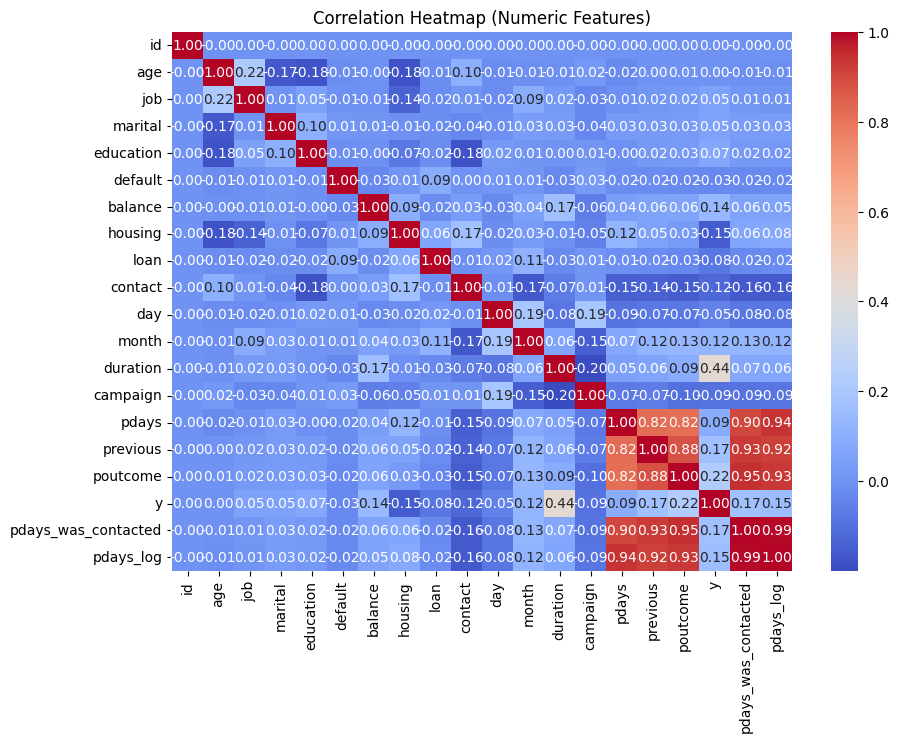

In [ ]:
plt.figure(figsize=(10,7))
corr = df_capped.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
df_capped=df_capped.drop(['pdays_was_contacted','pdays_log'],axis=True)

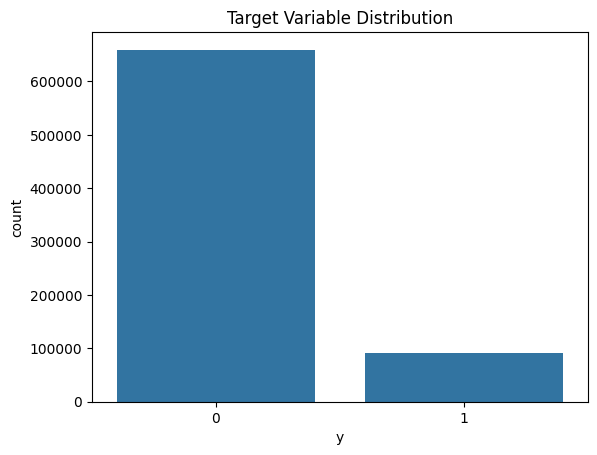

In [ ]:
sns.countplot(x=df_capped["y"])
plt.title("Target Variable Distribution")
plt.show()


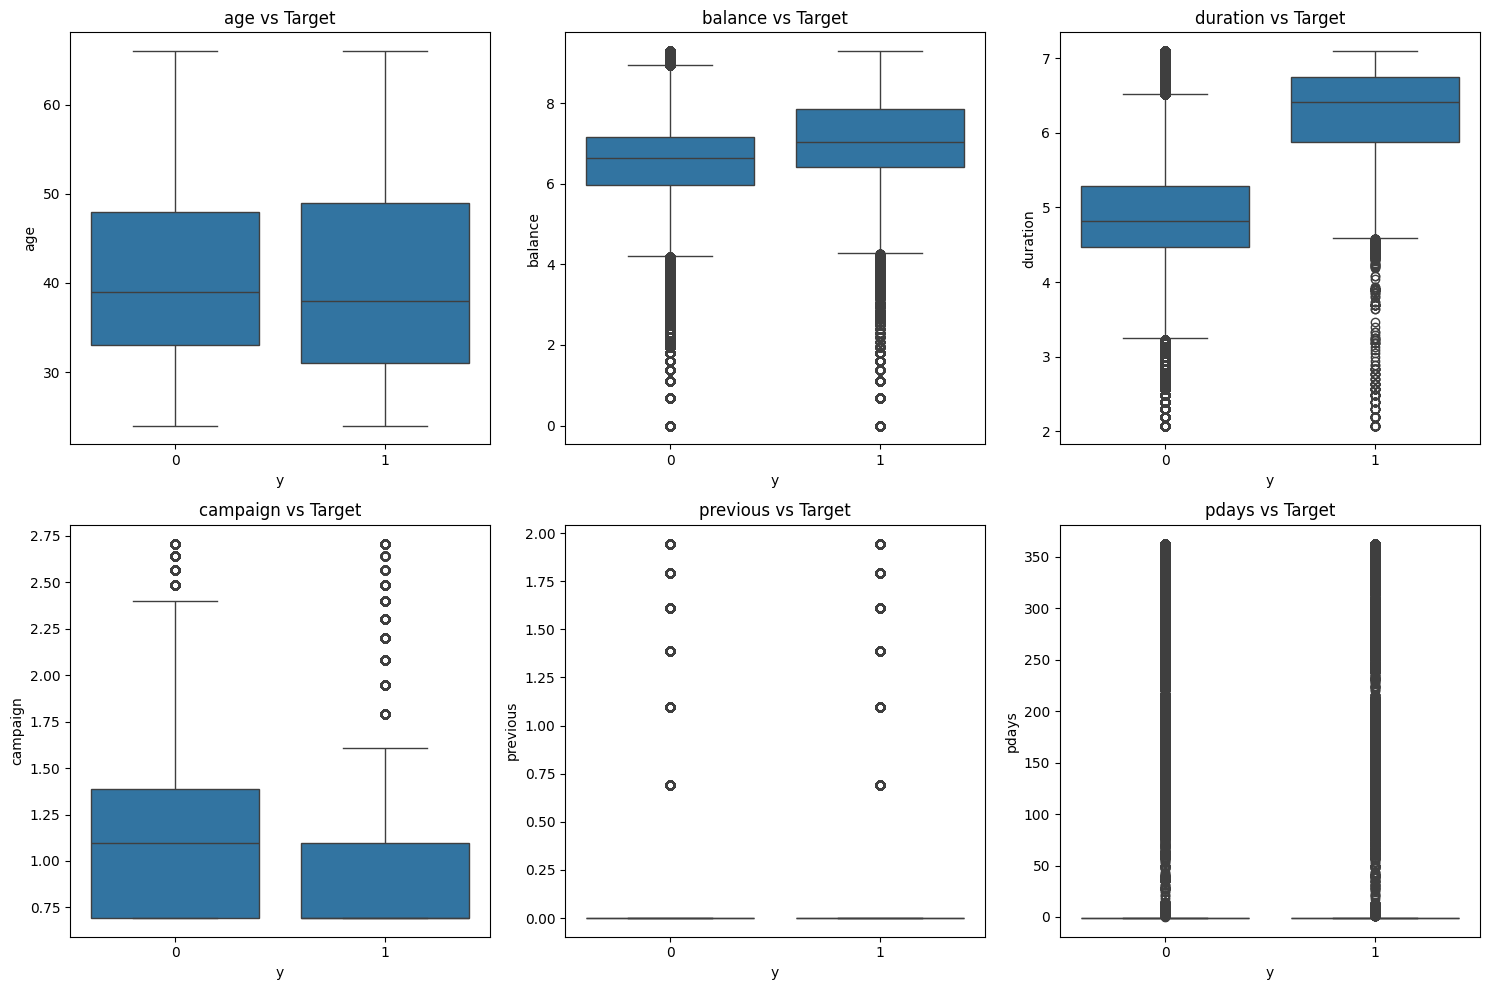

In [ ]:
num_cols = ["age", "balance", "duration", "campaign", "previous", "pdays"]

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="y", y=col, data=df_capped)
    plt.title(f"{col} vs Target")
plt.tight_layout()
plt.show()


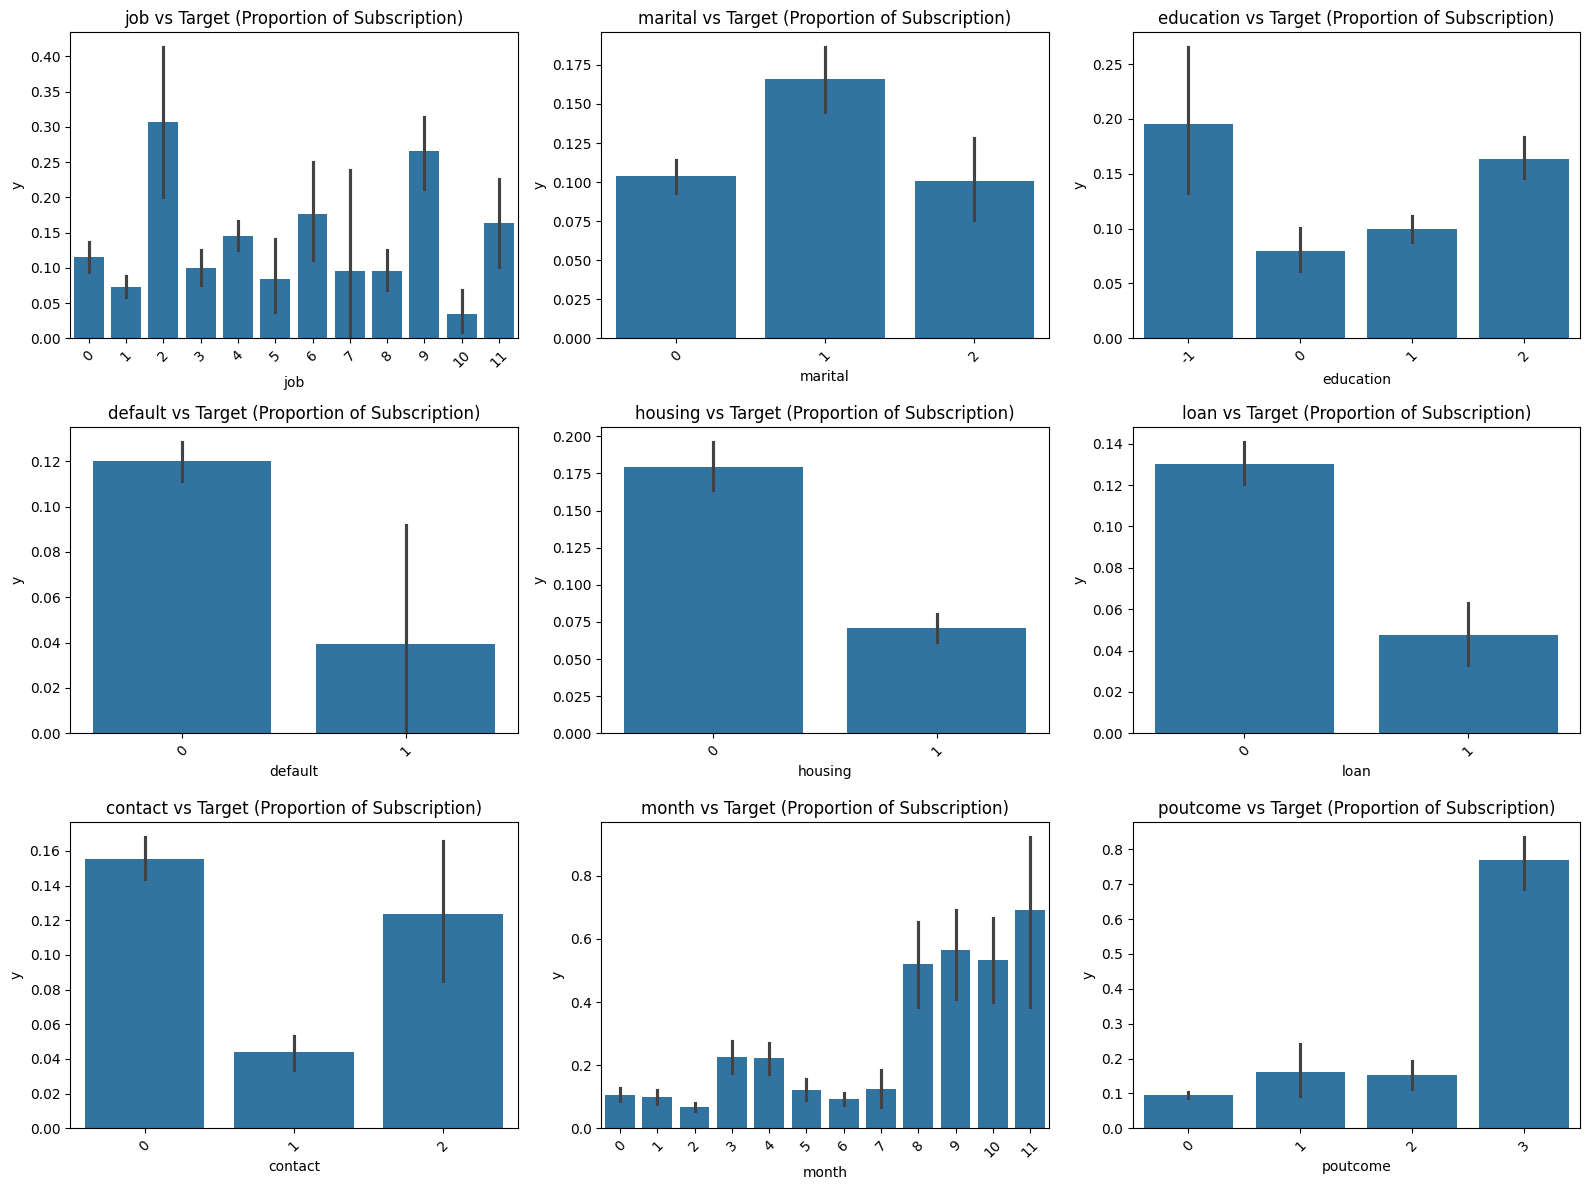

In [101]:
# Take a random sample to speed up plotting
sample_df = df_capped.sample(5000, random_state=42) if len(df_capped) > 5000 else df_capped

cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

plt.figure(figsize=(16, 12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=col, y="y", data=sample_df, estimator=lambda x: sum(x) / len(x))
    plt.xticks(rotation=45)
    plt.title(f"{col} vs Target (Proportion of Subscription)")
plt.tight_layout()
plt.show()


In [121]:
ids = df_capped["id"] 

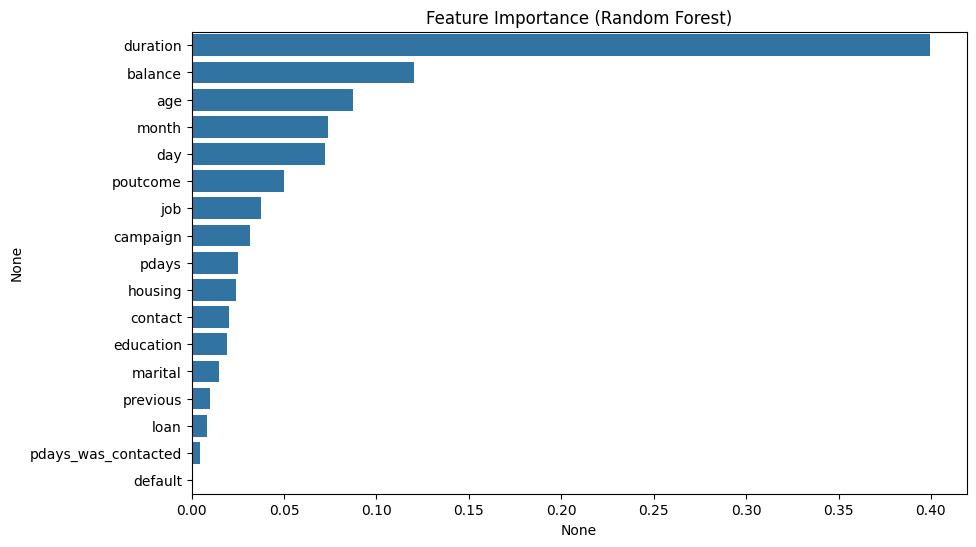

In [103]:
from sklearn.ensemble import RandomForestClassifier

X = df_capped.drop(["id","y"], axis=1)   # drop only y (remove "id" if it doesn’t exist)
y = df_capped["y"]

# Fewer trees + use all CPU cores
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)

feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [104]:
X=X.drop(["pdays_was_contacted","default"],axis=True)

In [113]:
!pip uninstall -y imbalanced-learn
!pip install imbalanced-learn==0.11.0


Found existing installation: imbalanced-learn 0.14.0
Uninstalling imbalanced-learn-0.14.0:
  Successfully uninstalled imbalanced-learn-0.14.0


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_capped.drop(["y","pdays_was_contacted"], axis=1)
y = df_capped["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96    131902
           1       0.76      0.62      0.68     18098

    accuracy                           0.93    150000
   macro avg       0.86      0.79      0.82    150000
weighted avg       0.93      0.93      0.93    150000


Confusion Matrix:
[[128452   3450]
 [  6967  11131]]


In [131]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    rf, X, y, cv=cv, scoring="f1"
)

print("Cross-validation F1 scores:", cv_scores)
print("Mean F1 score:", cv_scores.mean())


Cross-validation F1 scores: [0.68995687 0.68331288 0.68559912 0.68785845 0.68498001]
Mean F1 score: 0.6863414656854029


In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         750000 non-null  int64  
 1   age        750000 non-null  float64
 2   job        750000 non-null  int64  
 3   marital    750000 non-null  int64  
 4   education  750000 non-null  int64  
 5   default    750000 non-null  int64  
 6   balance    750000 non-null  float64
 7   housing    750000 non-null  int64  
 8   loan       750000 non-null  int64  
 9   contact    750000 non-null  int64  
 10  day        750000 non-null  float64
 11  month      750000 non-null  int64  
 12  duration   750000 non-null  float64
 13  campaign   750000 non-null  float64
 14  pdays      750000 non-null  float64
 15  previous   750000 non-null  float64
 16  poutcome   750000 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 97.3 MB


In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


In [140]:
# Get features used in training
train_features = X_train.columns

# One-hot encode test set
test_X = pd.get_dummies(df_test.drop(columns=["id"]))

# Align columns with train features (add missing columns as 0, drop extras)
test_X = test_X.reindex(columns=train_features, fill_value=0)

# Predict
preds = rf.predict(test_X)

# Create submission
submission = pd.DataFrame({
    "id": df_test["id"],
    "y": preds
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created with", submission.shape)


✅ submission.csv created with (250000, 2)
